# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Yasmeen Ehab Taha

ID: 46-5461

Tutorial: T02

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

This is to inspect the dataset in order to know what we are working with.

In [79]:
df.describe()


,SeniorCitizen,tenure
count,7032.000000,7032.000000
mean,0.162400,32.421786
std,0.368844,24.545260
min,0.000000,1.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [80]:
df.isnull().sum()


customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [81]:
df.isnull().any()

customerID           True
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [82]:
corr = df.corr()
corr

,SeniorCitizen,tenure
SeniorCitizen,1.000000,0.015683
tenure,0.015683,1.000000


In [83]:
print('Number of rows and columns in the data set:', df.shape)

Number of rows and columns in the data set: (7032, 21)


In [84]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [85]:
df['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: category
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

In [96]:
df.drop('customerID', axis=1)
df['TotalCharges'].fillna(df['TotalCharges'].mean() )

TypeError: ignored

## Data Pre-processing

In [49]:
df["MonthlyCharges"] =df["MonthlyCharges"].replace("$","")
df["MonthlyCharges"] =df["MonthlyCharges"].replace("/m","")
df["TotalCharges"] =df["TotalCharges"].replace("$","")


df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [50]:
df["MonthlyCharges"] = df["MonthlyCharges"].astype(float, errors = 'raise')
df["TotalCharges"] = df["TotalCharges"].astype(float, errors = 'raise')

In [51]:
df['gender'] = df['gender'].astype('category').cat.codes
df['gender']


0       0
1       1
2       1
3       1
4       0
       ..
7027    1
7028    0
7029    0
7030    1
7031    1
Name: gender, Length: 7032, dtype: int8

In [52]:
df['Partner'] = df['Partner'].astype('category').cat.codes
df['Partner']

0       1
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    1
7030    1
7031    0
Name: Partner, Length: 7032, dtype: int8

In [53]:

df['Dependents'] = df['Dependents'].astype('category').cat.codes
df['Dependents']

0       0
1       0
2       0
3       0
4       0
       ..
7027    1
7028    1
7029    1
7030    0
7031    0
Name: Dependents, Length: 7032, dtype: int8

In [54]:
df['PhoneService'] = df['PhoneService'].astype('category').cat.codes
df['PhoneService']

0       0
1       1
2       1
3       0
4       1
       ..
7027    1
7028    1
7029    0
7030    1
7031    1
Name: PhoneService, Length: 7032, dtype: int8

In [55]:
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category').cat.codes
df['PaperlessBilling']

0       1
1       0
2       1
3       0
4       1
       ..
7027    1
7028    1
7029    1
7030    1
7031    1
Name: PaperlessBilling, Length: 7032, dtype: int8

In [56]:

df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

In [57]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [58]:
df['Churn'].value_counts() / df['Churn'].count()

0    0.734215
1    0.265785
Name: Churn, dtype: float64

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [59]:
categorical_features = categorical_col.copy()
categorical_features.remove('Churn')

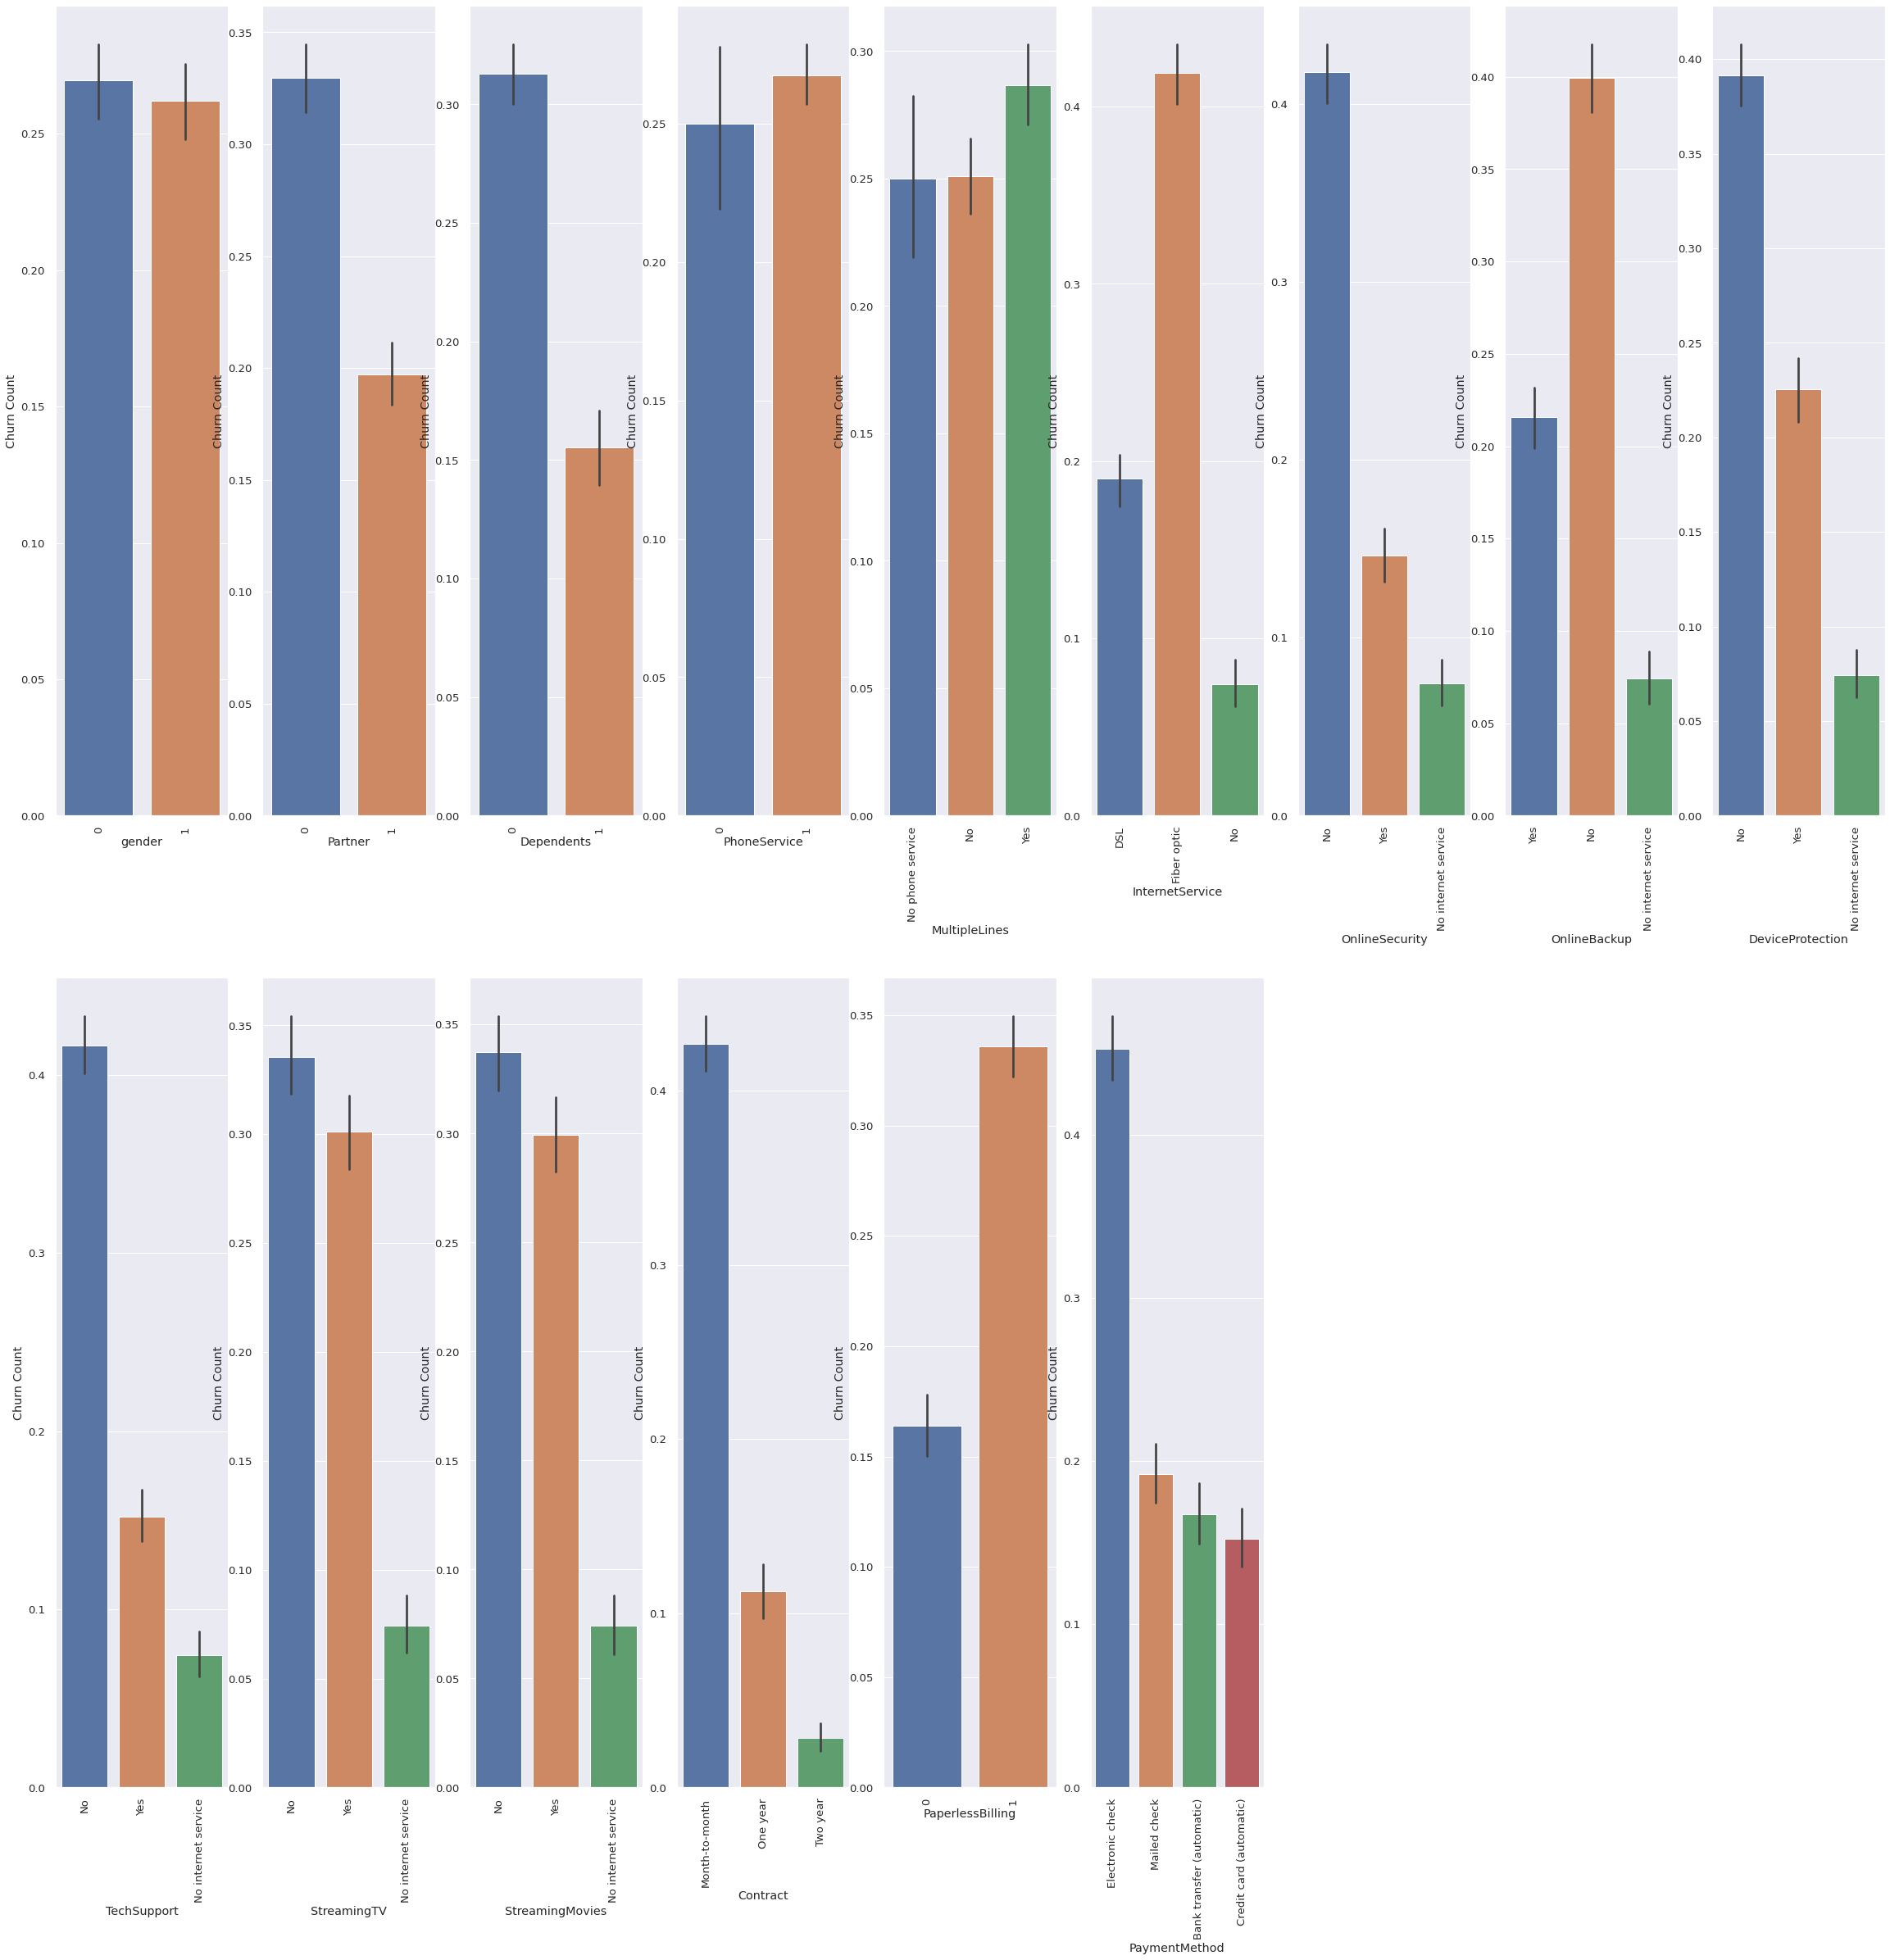

In [60]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(2, 9, i)
    g = sns.barplot(x=column, y='Churn', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn Count')
    plt.xlabel(f'{column}')

**Answer for Q1**: Your answer here

**Q2: Which payment method has the highest churn rate?**

**Visualization**

In [61]:
order = df[['PaymentMethod', 'Churn']].groupby('PaymentMethod').mean().sort_values('Churn', ascending=False).index
order

Index(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'],
      dtype='object', name='PaymentMethod')

**Answer for Q2**: The payment method that has the highest churn rate is the electronic check method.

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

**Answer for Q3**: Your answer here

## Modelling

In [62]:
df_encoded = df.copy()

In [63]:
df_encoded['Contract'] = df_encoded['Contract'].cat.codes
df_encoded['Contract']

0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    2
Name: Contract, Length: 7032, dtype: int8

In [64]:
categorical_features.remove('Contract')

In [76]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
df_encoded.info()

KeyError: ignored

In [75]:
df_encoded.drop([ 'gender_1', 'Partner_1','Dependents_1', 'PhoneService_1', 'PaperlessBilling_1'  ], axis='columns', inplace=True)
df_encoded.columns

KeyError: ignored

In [67]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Evaluation

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [69]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)


ValueError: ignored

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

## Decision Tree Visualization

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph
# alternatively, to export:
# graph.render('attrition')

## Bonus (Optional)